# **1. Installation de Yolo Ultralytics**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 5.6 MB/s eta 0:00:00


# **2. Hyperparamètres et téchargement du modèle Yolo V8**

In [2]:
nb_classes       = 2
batch_size       = 8 #@param [8,16,32,64] {type:"raw"}
epochs           = 20 #@param [5, 10,20,50,100,200] {type:"raw"}
dataset_path     = "/content/fire_detection_dataset/D-Fire"
input_dim        = 640 #@param [640] {type:"raw"}
train_dataset    = "images/train"
test_dataset     = "images/test"
valid_dataset    = "images/valid"
yaml_config_name = 'dataset.yaml'
project_path     = "/content/drive/MyDrive/fire/fire_detection"
yolo_version     = "yolov8s" #@param ["yolov8n", "yolov8s","yolov8m","yolov8l","yolov8x"] {type:"string"}
classes          =  ['smoke', 'fire']


# **3. Téléchargement de la BD d'entrainement à 2 classes**

In [3]:
!wget https://nextcloud.ig.umons.ac.be/s/8QNxNrPEEQyE9tN/download/d_fire.zip
!unzip d_fire.zip -d /content/fire_detection_dataset/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07519.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07520.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07521.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07523.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07524.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07526.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07527.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07528.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07529.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07530.txt  
  inflating: /content/fire_detection_dataset/D-Fire/labels/train/WEB07531.txt  
  inflating: /content/fire_detection_datas

# **4. Configuration Yolo "Yaml config editing"**

In [4]:
import yaml

def generate_yolo_config(output_path):
    # Define the configuration
    config = {
        "path":dataset_path,  # dataset root dir
        "train": train_dataset,  # train images (relative to 'path')
        "val": valid_dataset,  # val images (relative to 'path')
        "test": test_dataset,
        'names': classes
    }

    # Write the configuration to a .yaml file
    with open(output_path, 'w') as file:
        yaml.dump(config, file, default_flow_style=False)

generate_yolo_config(yaml_config_name)


# **5. Entrainement du modèle**

In [5]:
from ultralytics import YOLO

model = YOLO(f'{yolo_version}.pt')

# Train model
results = model.train(data='dataset.yaml', epochs=epochs, imgsz=input_dim)

# Evaluate model
results = model.val()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 228MB/s]


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 82.8MB/s]


AMP: checks passed ✅


train: Scanning /content/fire_detection_dataset/D-Fire/labels/train... 13776 images, 6258 backgrounds, 0 corrupt: 100%|██████████| 13776/13776 [00:06<00:00, 2011.87it/s]

train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB02521.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB06626.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB07199.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB07271.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB07297.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB07305.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB07312.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WEB07534.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/train/WE

train: New cache created: /content/fire_detection_dataset/D-Fire/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/fire_detection_dataset/D-Fire/labels/valid... 3445 images, 1575 backgrounds, 0 corrupt: 100%|██████████| 3445/3445 [00:02<00:00, 1403.99it/s]

val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07278.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07556.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07559.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07562.jpg: corrupt JPEG restored and saved


val: New cache created: /content/fire_detection_dataset/D-Fire/labels/valid.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.07G      1.723       2.16      1.607         38        640: 100%|██████████| 861/861 [05:25<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:33<00:00,  3.23it/s]


                   all       3445       4298      0.392      0.419      0.333      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.86G      1.777      1.931      1.643         29        640: 100%|██████████| 861/861 [05:20<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.44it/s]


                   all       3445       4298      0.423      0.392      0.338      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.92G      1.737      1.872      1.606         30        640: 100%|██████████| 861/861 [05:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:29<00:00,  3.70it/s]


                   all       3445       4298      0.466      0.438      0.416      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.88G      1.673      1.777      1.569         60        640: 100%|██████████| 861/861 [05:16<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.49it/s]


                   all       3445       4298      0.523      0.473      0.457      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.2G      1.631      1.693       1.53         46        640: 100%|██████████| 861/861 [05:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.45it/s]


                   all       3445       4298      0.575      0.502      0.526      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.87G      1.589      1.605      1.499         40        640: 100%|██████████| 861/861 [05:16<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.57it/s]


                   all       3445       4298      0.568      0.519      0.545      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.07G      1.555      1.543      1.482         35        640: 100%|██████████| 861/861 [05:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.56it/s]


                   all       3445       4298      0.599      0.537       0.57      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.03G      1.528       1.48      1.456         47        640: 100%|██████████| 861/861 [05:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.53it/s]

                   all       3445       4298      0.648      0.558       0.61      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.03G      1.506      1.444      1.449         31        640: 100%|██████████| 861/861 [05:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.46it/s]


                   all       3445       4298      0.651      0.584      0.631      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.05G      1.484      1.401      1.424         69        640: 100%|██████████| 861/861 [05:16<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.53it/s]


                   all       3445       4298      0.674      0.583      0.648      0.347
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.04G      1.571      1.416      1.487         12        640: 100%|██████████| 861/861 [05:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:34<00:00,  3.17it/s]


                   all       3445       4298      0.663      0.582      0.647       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.04G      1.531      1.343      1.465         34        640: 100%|██████████| 861/861 [05:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:29<00:00,  3.60it/s]


                   all       3445       4298      0.677        0.6       0.66      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.85G      1.518      1.327      1.462         12        640: 100%|██████████| 861/861 [05:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.52it/s]

                   all       3445       4298      0.658      0.595      0.651      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.89G      1.481      1.277      1.434          9        640: 100%|██████████| 861/861 [05:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.49it/s]

                   all       3445       4298      0.692      0.618      0.684      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.02G      1.462      1.229       1.42         18        640: 100%|██████████| 861/861 [05:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:29<00:00,  3.68it/s]


                   all       3445       4298      0.714      0.624      0.696      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.04G      1.434      1.177      1.402         16        640: 100%|██████████| 861/861 [05:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.42it/s]


                   all       3445       4298       0.69       0.63      0.702      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.01G      1.415      1.142      1.391         25        640: 100%|██████████| 861/861 [05:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.59it/s]

                   all       3445       4298      0.724      0.629      0.711      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.03G      1.387      1.103      1.376         11        640: 100%|██████████| 861/861 [05:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:34<00:00,  3.12it/s]


                   all       3445       4298      0.718       0.65      0.722      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.89G      1.367       1.06      1.359         27        640: 100%|██████████| 861/861 [05:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:30<00:00,  3.57it/s]


                   all       3445       4298      0.735      0.656      0.732       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.05G      1.338      1.022      1.342         27        640: 100%|██████████| 861/861 [05:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:33<00:00,  3.27it/s]

                   all       3445       4298       0.73      0.666      0.735      0.427



20 epochs completed in 1.908 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:31<00:00,  3.47it/s]


                   all       3445       4298       0.73      0.666      0.735      0.427
                 smoke       1706       1922       0.77      0.722       0.79      0.493
                  fire        936       2376      0.689      0.609      0.681      0.361
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/fire_detection_dataset/D-Fire/labels/valid.cache... 3445 images, 1575 backgrounds, 0 corrupt: 100%|██████████| 3445/3445 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07278.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07556.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07559.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/fire_detection_dataset/D-Fire/images/valid/WEB07562.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [00:38<00:00,  5.63it/s]


                   all       3445       4298       0.73      0.665      0.736      0.427
                 smoke       1706       1922      0.771      0.723      0.791      0.493
                  fire        936       2376      0.689      0.606      0.681      0.361
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


# **6. Evaluation du modèle avec une image de test**


image 1/1 /content/fire_detection_dataset/D-Fire/images/train/AoF00001.jpg: 352x640 1 fire, 11.4ms
Speed: 2.8ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


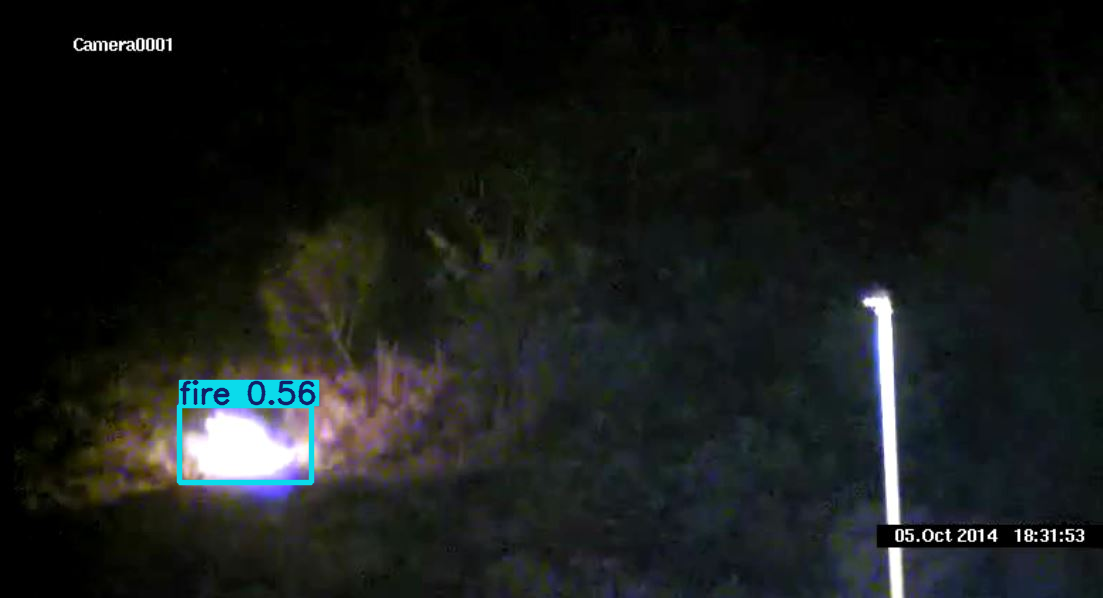

In [7]:
results = model(f'{dataset_path}/images/train/AoF00001.jpg')
for result in results:
    boxes = result.boxes
    masks = result.masks
    result.show()